In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import random
from IPython.display import HTML  # for embedded matplotlib animation
from math import *

matplotlib.rc('animation', html='html5')



The following are the ideas for implementing our simulation for SIR using ideas of cellular automata


Varying population density\
Introducing deaths

In [ ]:
def initbar(columns,rows):
    m=0
    matrix= np.ones((columns, rows))
    k=columns/2
    for j in np.arange(24,50,1):
        m+=1
        for i in np.arange(0,10,1):
          m+=j
          if(m%2==0):
            matrix[j,i]=0
    return matrix.T

In [ ]:
def popdistribution(matrix):
  # for i in range(len(matrix)):
  #   for j in range(len(matrix[0])):
  #     if (matrix[i][j]==1):
  #       if(i%2==0 and j%2==0):
  #         matrix[i][j]=2       # children
  return matrix

In [ ]:
def infected(pr,matrix):
  n = len(matrix)
  m = len(matrix[0])
  total=m*n
  num=int(pr*total)
  cells_assigned = 0
  while cells_assigned < num:
      row = random.randint(0, n - 1)
      col = random.randint(0, m - 1)

      if matrix[row][col] ==1 or matrix[row][col] == 2 :
          matrix[row][col] = 3
          cells_assigned += 1
  return matrix

In [ ]:
def infection_spreads(matrix):
  n=len(matrix)
  m=len(matrix[0])
  matrix1=matrix
  for i in range(0,n):
    for j in range(0,m):
      inf=0
      if(matrix[i][j]==1):
        #code for adult
          if( j+1<m and matrix[i][j+1]==3):
              inf+=1
          if(j-1>=0 and matrix[i][j-1]==3):
              inf+=1
          if(i+1<n and matrix[i+1][j]==3):
              inf+=1
          if(i-1>=0 and matrix[i-1][j]==3):
              inf+=1
          if(inf==1):
            r=random.random()
            if(r<0.2):
              matrix1[i][j]=3
          elif(inf==2):
            r=random.random()
            if(r<0.36):
              matrix1[i][j]=3
          elif(inf==3):
            r=random.random()
            if(r<0.488):
              matrix1[i][j]=3
          elif(inf==4):
            r=random.random()
            if(r<0.6):
              matrix1[i][j]=3
      if (matrix[i][j]==2):
        #code for children
          if( j+1<m and matrix[i][j+1]==3):
              inf+=1
          if(j-1>=0 and matrix[i][j-1]==3):
              inf+=1
          if(i+1<n and matrix[i+1][j]==3):
              inf+=1
          if(i-1>=0 and matrix[i-1][j]==3):
              inf+=1
          if(inf==0):
            continue
          if(inf==1):
            r=random.random()
            if(r<0.1):
              matrix1[i][j]=3
          elif(inf==2):
            r=random.random()
            if(r<0.19):
              matrix1[i][j]=3
          elif(inf==3):
            r=random.random()
            if(r<0.271):
                 matrix1[i][j]=3
          elif(inf==4):
            r=random.random()
            if(r<0.344):
              matrix1[i][j]=3
      if(matrix[i][j]==3):
        r=random.random()
        if(r<0.1):      # 10 percent chances the person will die
          matrix1[i][j]=0
        if(r>0.5):        # 50 percent chances the person will recover
          matrix1[i][j]=4 #recovered
  return matrix1

In [ ]:
def allgrids(m,t):
  bar = m
  grids = np.zeros((t + 1, 10, 50))
  grids[0, :, :] = bar
  for i in range(1, t + 1):
    bar=infection_spreads(bar)
    grids[i, :, :] = bar
  return grids

In [ ]:
#generating grids for 1 iteration
matrix=initbar(50,10)
matrix=popdistribution(matrix)
matrix=infected(0.3,matrix)
L=50
grids=allgrids(matrix,L)

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
def makeColorGridVibrant(grid):
    m = grid.shape[0]
    n = grid.shape[1]
    colorGrid = np.zeros((m, n, 3), dtype=np.float32)

    color_map = {
        0: [255, 0, 0],      # Red
        1: [128, 0, 128],    # Purple
        2: [0, 255, 0],      # Green, but there will be no 2
        3: [0, 255, 0],    # Green
        4: [0, 0, 255]       # Blue
    }

    for i in range(m):
        for j in range(n):
            value = grid[i][j]
            if value in color_map:
                colorGrid[i, j] = np.array(color_map[value]) / 255.0

    return colorGrid


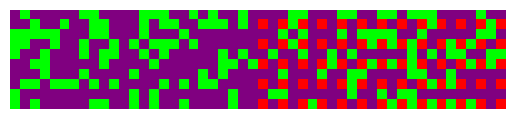

In [ ]:
fig = plt.figure()
plt.axis('off')
im = plt.imshow(makeColorGridVibrant(grids[0,:,:]), animated=True)

# The animation function: called to produce a frame for each generation.
def updatefig(i, *args):
    global grids
    im.set_array(makeColorGridVibrant(grids[i,:,:]))
    return im,

grid_ani = animation.FuncAnimation(fig, updatefig, save_count=len(grids),
                                   interval=1000, blit=False)

# Save the animation as a video file
writer = animation.FFMpegWriter(fps=30, metadata=dict(artist='Me'), bitrate=1800)
grid_ani.save('DiffusionColor.mp4', writer=writer)

# Display the animation in the notebook
HTML(grid_ani.to_html5_video())

 color_map =
       

*    0: Red -- dead
*    1: Purple -- adult
*    3: Green -- infected
*    4: Blue -- recovered

We will try to observe the Size of Epidemic vs Transmission probability ( probability of an infected to infect someone) else when it comes in contact, by this we want to observe if there is any specific value of this probability below which the epidemic can be contained. If we do observe such a value then we would want to decrease the probability of spreading the infection by preventory measures such as masks, gloves so that even if the contact with infected happens but the transmission probability is less, which if becomes less than a certain value then epidemic would be contained. Another perspective would be to hospitalize those people who are already infected to decrease the population of infected in the population. However for simplicity we will assume that there are initially a fixed number of people in the population which remain same for the whole analysis of Transmission Probability vs Size of epidemic.

In [ ]:
def tocalculatesize(matrix):
    n = len(matrix)
    m = len(matrix[0])
    count=0
    for i in range(0,n):
      for j in range(0,m):
        if(matrix[i][j]==0 or matrix[i][j]==4):
          count+=1
    return count-60

In [ ]:
def Ekconfig_size(pr,iter):  # pr ki value <1 and >0 it is the percentage of people infected initially
  sizeforpr=[]
  for i in range(0,iter):
    matrix=initbar(50,10)
    matrix=popdistribution(matrix)
    matrix=infected(pr,matrix)
    L=100
    grids=allgrids(matrix,L,1)
    final_m=grids[L-1,:,:]
    size=tocalculatesize(final_m)
    percent=(size/460)*100
    sizeforpr=np.append(sizeforpr,percent)
  r=range(0,iter)
  plt.plot(r,sizeforpr)
  plt.xlabel('Iterations')
  plt.ylabel('size of epidemic')
  plt.show()
  mean=np.mean(sizeforpr)
  print(mean)

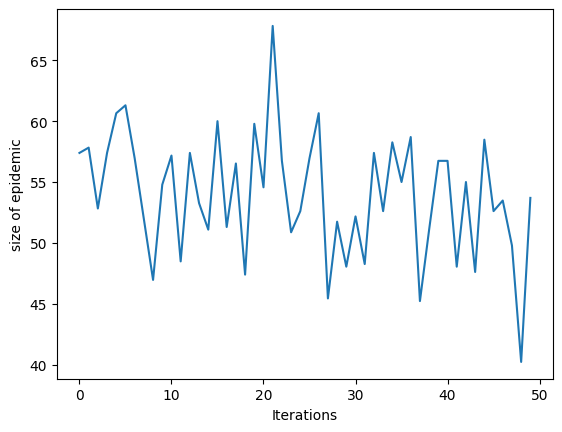

53.93913043478262


In [ ]:
Ekconfig_size(0.1,50)
#10 percent people infected initially
#Like a random walk

In [ ]:
def infection_spreads_for_pr(pra, matrix):
  n=len(matrix)
  m=len(matrix[0])
  matrix1=matrix
  for i in range(0,n):
    for j in range(0,m):
      inf=0
      if(matrix[i][j]==1):
        #code for adult
          if( j+1<m and matrix[i][j+1]==3):
              inf+=1
          if(j-1>=0 and matrix[i][j-1]==3):
              inf+=1
          if(i+1<n and matrix[i+1][j]==3):
              inf+=1
          if(i-1>=0 and matrix[i-1][j]==3):
              inf+=1
          if(inf==1):
            r=random.random()
            if(r<pra):
              matrix1[i][j]=3
          elif(inf==2):
            r=random.random()
            if(r<(1-pra*pra)):
              matrix1[i][j]=3
          elif(inf==3):
            r=random.random()
            if(r<(1-pra*pra*pra)):
              matrix1[i][j]=3
          elif(inf==4):
            r=random.random()
            if(r<(1-pra*pra*pra*pra)):
              matrix1[i][j]=3
      if(matrix[i][j]==3):
        r=random.random()
        if(r<0.1):      # 10 percent chances the person will die
          matrix1[i][j]=0
        if(r>0.5):        # 50 percent chances the person will recover
          matrix1[i][j]=4 #recovered
  return matrix1

In [ ]:
def allgrids(m,t,pra):
  bar = m
  grids = np.zeros((t + 1, 10, 50))
  grids[0, :, :] = bar
  for i in range(1, t + 1):
    bar=infection_spreads_for_pr(pra,bar)
    grids[i, :, :] = bar
  return grids

In [ ]:
def Observables(iter):
  meanforpr=[]
  prar=[]
  for j in range(0,21):  # probability of infection k variations
    pra=j*0.05
    prc=j*0.05
    sizeforpr=[]
    for i in range(0,iter):         # number of obs you want for one value of probability
      matrix=initbar(50,10)
      matrix=popdistribution(matrix)
      matrix=infected(0.1,matrix)
      L=50                            #steady state number grid
      grids=allgrids(matrix,L,pra)
      final_m=grids[L-1,:,:]
      size=tocalculatesize(final_m)
      percent=(size/440)*100
      sizeforpr=np.append(sizeforpr,percent)
    mean=np.mean(sizeforpr)
    meanforpr=np.append(meanforpr,mean)
    prar=np.append(prar,pra)
  plt.plot(prar,meanforpr)

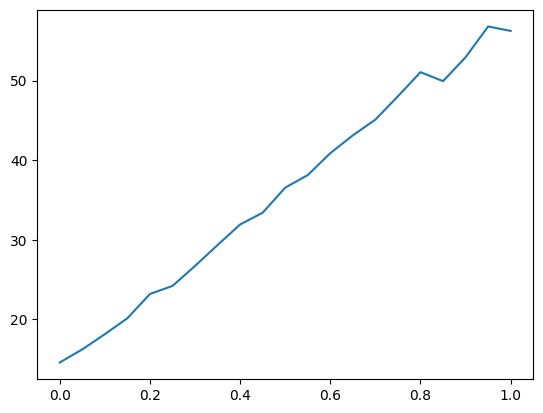

In [ ]:
Observables(20)